In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
teis_month = pd.read_excel('../data/TEIS Referral Data for NSS Compiled Monthly.xlsx')
teis_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113256 entries, 0 to 113255
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   POE                          113256 non-null  object        
 1   Child ID                     113256 non-null  int64         
 2   DOB                          113256 non-null  datetime64[ns]
 3   County Name                  113251 non-null  object        
 4   County SES                   113251 non-null  object        
 5   Child Phase                  113256 non-null  object        
 6   Active                       113256 non-null  object        
 7   Service Coordinator          113255 non-null  object        
 8   Notification/ Referral Date  113256 non-null  datetime64[ns]
 9   Parent Consent Date          58101 non-null   datetime64[ns]
 10  Referral Source Type Name    113256 non-null  object        
 11  Initial Eligibility       

In [3]:
#teis_month = pd.to_datetime(teis_month['Exit Date'], errors = 'coerce')

In [4]:
teis_month_keep = teis_month[['POE', 'DOB', 'County Name', 'County SES', 'Referral Source Type Name', 'Notification/ Referral Date','Exit Date']]
teis_month_keep

,POE,DOB,County Name,County SES,Referral Source Type Name,Notification/ Referral Date,Exit Date
0,ET,2014-08-09,Blount,Transitional,Foster Parent,2016-07-01,NaN
1,FT,2013-07-31,Unicoi,At-Risk,DCS,2016-07-01,2016-07-01 00:00:00
2,FT,2016-02-05,Sullivan,Transitional,DCS,2016-07-01,NaN
3,FT,2015-12-06,Sullivan,Transitional,PCP,2016-07-01,NaN
4,FT,2015-04-18,Hawkins,At-Risk,Parent,2016-07-01,NaN
...,...,...,...,...,...,...,...
113251,UC,2021-04-07,Sumner,Competitive,Parent,2022-05-16,NaN
113252,UC,2022-03-13,Sumner,Competitive,Hospital,2022-05-11,NaN
113253,UC,2022-01-05,Cumberland,Transitional,Parent,2022-05-10,NaN
113254,UC,2020-09-12,Sumner,Competitive,PCP,2022-05-06,NaN


In [5]:
teis_ref = pd.read_excel('../data/TEIS Referral Data for NSS.xlsx')
teis_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96580 entries, 0 to 96579
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   POE                        96580 non-null  object        
 1   Child ID                   96580 non-null  int64         
 2   DOB                        96580 non-null  datetime64[ns]
 3   County Name                96576 non-null  object        
 4   County SES                 96576 non-null  object        
 5   Child Phase                96580 non-null  object        
 6   Active                     96580 non-null  object        
 7   Service Coordinator        96579 non-null  object        
 8   Notification Date          96580 non-null  datetime64[ns]
 9   Parent Consent Date        70026 non-null  datetime64[ns]
 10  Referral Source Type Name  96580 non-null  object        
 11  Initial Eligibility        68221 non-null  object        
 12  Init

In [6]:
teis_ref_keep = teis_ref[['POE', 'DOB', 'County Name', 'County SES ', 'Referral Source Type Name', 'Notification Date','Exit Date']]
teis_ref_keep

,POE,DOB,County Name,County SES,Referral Source Type Name,Notification Date,Exit Date
0,ET,2016-12-14,Blount,Transitional,DCS,2016-12-16,2016-12-29
1,ET,2015-04-06,Knox,Transitional,Parent,2017-04-24,2017-05-16
2,ET,2016-03-04,Roane,Transitional,DCS,2017-06-06,2017-06-30
3,ET,2015-05-11,Knox,Transitional,Other,2017-05-24,2017-06-16
4,ET,2015-09-23,Knox,Transitional,Other,2016-07-18,2018-09-21
...,...,...,...,...,...,...,...
96575,UC,2020-04-10,Macon,Transitional,PCP,2022-01-12,2022-01-31
96576,UC,2020-09-12,Sumner,Competitive,PCP,2022-05-06,NaT
96577,UC,2019-08-27,Sumner,Competitive,PCP,2022-03-29,2022-04-11
96578,UC,2022-02-08,Smith,Transitional,Parent,2022-05-11,NaT


In [7]:
teis_ref_keep['exit_date_age'] = (teis_ref_keep['Exit Date'] - teis_ref_keep['DOB'])
teis_ref_keep

C:\Users\bruna\AppData\Local\Temp/ipykernel_27368/1811102004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_ref_keep['exit_date_age'] = (teis_ref_keep['Exit Date'] - teis_ref_keep['DOB'])


,POE,DOB,County Name,County SES,Referral Source Type Name,Notification Date,Exit Date,exit_date_age
0,ET,2016-12-14,Blount,Transitional,DCS,2016-12-16,2016-12-29,15 days
1,ET,2015-04-06,Knox,Transitional,Parent,2017-04-24,2017-05-16,771 days
2,ET,2016-03-04,Roane,Transitional,DCS,2017-06-06,2017-06-30,483 days
3,ET,2015-05-11,Knox,Transitional,Other,2017-05-24,2017-06-16,767 days
4,ET,2015-09-23,Knox,Transitional,Other,2016-07-18,2018-09-21,1094 days
...,...,...,...,...,...,...,...,...
96575,UC,2020-04-10,Macon,Transitional,PCP,2022-01-12,2022-01-31,661 days
96576,UC,2020-09-12,Sumner,Competitive,PCP,2022-05-06,NaT,NaT
96577,UC,2019-08-27,Sumner,Competitive,PCP,2022-03-29,2022-04-11,958 days
96578,UC,2022-02-08,Smith,Transitional,Parent,2022-05-11,NaT,NaT


In [8]:
teis_ref_keep['notification_date_age'] = (teis_ref_keep['Notification Date'] - teis_ref_keep['DOB'])
teis_ref_keep

C:\Users\bruna\AppData\Local\Temp/ipykernel_27368/2821820643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_ref_keep['notification_date_age'] = (teis_ref_keep['Notification Date'] - teis_ref_keep['DOB'])


,POE,DOB,County Name,County SES,Referral Source Type Name,Notification Date,Exit Date,exit_date_age,notification_date_age
0,ET,2016-12-14,Blount,Transitional,DCS,2016-12-16,2016-12-29,15 days,2 days
1,ET,2015-04-06,Knox,Transitional,Parent,2017-04-24,2017-05-16,771 days,749 days
2,ET,2016-03-04,Roane,Transitional,DCS,2017-06-06,2017-06-30,483 days,459 days
3,ET,2015-05-11,Knox,Transitional,Other,2017-05-24,2017-06-16,767 days,744 days
4,ET,2015-09-23,Knox,Transitional,Other,2016-07-18,2018-09-21,1094 days,299 days
...,...,...,...,...,...,...,...,...,...
96575,UC,2020-04-10,Macon,Transitional,PCP,2022-01-12,2022-01-31,661 days,642 days
96576,UC,2020-09-12,Sumner,Competitive,PCP,2022-05-06,NaT,NaT,601 days
96577,UC,2019-08-27,Sumner,Competitive,PCP,2022-03-29,2022-04-11,958 days,945 days
96578,UC,2022-02-08,Smith,Transitional,Parent,2022-05-11,NaT,NaT,92 days


In [9]:
teis_ref_keep['years_exit'] = teis_ref_keep['exit_date_age'].dt.days/365
teis_ref_keep

C:\Users\bruna\AppData\Local\Temp/ipykernel_27368/4242228998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_ref_keep['years_exit'] = teis_ref_keep['exit_date_age'].dt.days/365


,POE,DOB,County Name,County SES,Referral Source Type Name,Notification Date,Exit Date,exit_date_age,notification_date_age,years_exit
0,ET,2016-12-14,Blount,Transitional,DCS,2016-12-16,2016-12-29,15 days,2 days,0.041096
1,ET,2015-04-06,Knox,Transitional,Parent,2017-04-24,2017-05-16,771 days,749 days,2.112329
2,ET,2016-03-04,Roane,Transitional,DCS,2017-06-06,2017-06-30,483 days,459 days,1.323288
3,ET,2015-05-11,Knox,Transitional,Other,2017-05-24,2017-06-16,767 days,744 days,2.101370
4,ET,2015-09-23,Knox,Transitional,Other,2016-07-18,2018-09-21,1094 days,299 days,2.997260
...,...,...,...,...,...,...,...,...,...,...
96575,UC,2020-04-10,Macon,Transitional,PCP,2022-01-12,2022-01-31,661 days,642 days,1.810959
96576,UC,2020-09-12,Sumner,Competitive,PCP,2022-05-06,NaT,NaT,601 days,NaN
96577,UC,2019-08-27,Sumner,Competitive,PCP,2022-03-29,2022-04-11,958 days,945 days,2.624658
96578,UC,2022-02-08,Smith,Transitional,Parent,2022-05-11,NaT,NaT,92 days,NaN


In [10]:
teis_ref_keep['years_notification'] = teis_ref_keep['exit_date_age'].dt.days/365
teis_ref_keep

C:\Users\bruna\AppData\Local\Temp/ipykernel_27368/2526859052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_ref_keep['years_notification'] = teis_ref_keep['exit_date_age'].dt.days/365


,POE,DOB,County Name,County SES,Referral Source Type Name,Notification Date,Exit Date,exit_date_age,notification_date_age,years_exit,years_notification
0,ET,2016-12-14,Blount,Transitional,DCS,2016-12-16,2016-12-29,15 days,2 days,0.041096,0.041096
1,ET,2015-04-06,Knox,Transitional,Parent,2017-04-24,2017-05-16,771 days,749 days,2.112329,2.112329
2,ET,2016-03-04,Roane,Transitional,DCS,2017-06-06,2017-06-30,483 days,459 days,1.323288,1.323288
3,ET,2015-05-11,Knox,Transitional,Other,2017-05-24,2017-06-16,767 days,744 days,2.101370,2.101370
4,ET,2015-09-23,Knox,Transitional,Other,2016-07-18,2018-09-21,1094 days,299 days,2.997260,2.997260
...,...,...,...,...,...,...,...,...,...,...,...
96575,UC,2020-04-10,Macon,Transitional,PCP,2022-01-12,2022-01-31,661 days,642 days,1.810959,1.810959
96576,UC,2020-09-12,Sumner,Competitive,PCP,2022-05-06,NaT,NaT,601 days,NaN,NaN
96577,UC,2019-08-27,Sumner,Competitive,PCP,2022-03-29,2022-04-11,958 days,945 days,2.624658,2.624658
96578,UC,2022-02-08,Smith,Transitional,Parent,2022-05-11,NaT,NaT,92 days,NaN,NaN


In [11]:
teis_ref_keep['months_exit'] = teis_ref_keep['exit_date_age'].dt.days/30
teis_ref_keep

C:\Users\bruna\AppData\Local\Temp/ipykernel_27368/1405031746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_ref_keep['months_exit'] = teis_ref_keep['exit_date_age'].dt.days/30


,POE,DOB,County Name,County SES,Referral Source Type Name,Notification Date,Exit Date,exit_date_age,notification_date_age,years_exit,years_notification,months_exit
0,ET,2016-12-14,Blount,Transitional,DCS,2016-12-16,2016-12-29,15 days,2 days,0.041096,0.041096,0.500000
1,ET,2015-04-06,Knox,Transitional,Parent,2017-04-24,2017-05-16,771 days,749 days,2.112329,2.112329,25.700000
2,ET,2016-03-04,Roane,Transitional,DCS,2017-06-06,2017-06-30,483 days,459 days,1.323288,1.323288,16.100000
3,ET,2015-05-11,Knox,Transitional,Other,2017-05-24,2017-06-16,767 days,744 days,2.101370,2.101370,25.566667
4,ET,2015-09-23,Knox,Transitional,Other,2016-07-18,2018-09-21,1094 days,299 days,2.997260,2.997260,36.466667
...,...,...,...,...,...,...,...,...,...,...,...,...
96575,UC,2020-04-10,Macon,Transitional,PCP,2022-01-12,2022-01-31,661 days,642 days,1.810959,1.810959,22.033333
96576,UC,2020-09-12,Sumner,Competitive,PCP,2022-05-06,NaT,NaT,601 days,NaN,NaN,NaN
96577,UC,2019-08-27,Sumner,Competitive,PCP,2022-03-29,2022-04-11,958 days,945 days,2.624658,2.624658,31.933333
96578,UC,2022-02-08,Smith,Transitional,Parent,2022-05-11,NaT,NaT,92 days,NaN,NaN,NaN


In [12]:
#concat the two tables 
teis_all = pd.concat([teis_month_keep, teis_ref_keep])
teis_all

,POE,DOB,County Name,County SES,Referral Source Type Name,Notification/ Referral Date,Exit Date,County SES,Notification Date,exit_date_age,notification_date_age,years_exit,years_notification,months_exit
0,ET,2014-08-09,Blount,Transitional,Foster Parent,2016-07-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
1,FT,2013-07-31,Unicoi,At-Risk,DCS,2016-07-01,2016-07-01 00:00:00,NaN,NaT,NaT,NaT,NaN,NaN,NaN
2,FT,2016-02-05,Sullivan,Transitional,DCS,2016-07-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
3,FT,2015-12-06,Sullivan,Transitional,PCP,2016-07-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
4,FT,2015-04-18,Hawkins,At-Risk,Parent,2016-07-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96575,UC,2020-04-10,Macon,NaN,PCP,NaT,2022-01-31 00:00:00,Transitional,2022-01-12,661 days,642 days,1.810959,1.810959,22.033333
96576,UC,2020-09-12,Sumner,NaN,PCP,NaT,NaT,Competitive,2022-05-06,NaT,601 days,NaN,NaN,NaN
96577,UC,2019-08-27,Sumner,NaN,PCP,NaT,2022-04-11 00:00:00,Competitive,2022-03-29,958 days,945 days,2.624658,2.624658,31.933333
96578,UC,2022-02-08,Smith,NaN,Parent,NaT,NaT,Transitional,2022-05-11,NaT,92 days,NaN,NaN,NaN


In [13]:
teis_all_clean = teis_all.drop_duplicates()
teis_all_clean

,POE,DOB,County Name,County SES,Referral Source Type Name,Notification/ Referral Date,Exit Date,County SES,Notification Date,exit_date_age,notification_date_age,years_exit,years_notification,months_exit
0,ET,2014-08-09,Blount,Transitional,Foster Parent,2016-07-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
1,FT,2013-07-31,Unicoi,At-Risk,DCS,2016-07-01,2016-07-01 00:00:00,NaN,NaT,NaT,NaT,NaN,NaN,NaN
2,FT,2016-02-05,Sullivan,Transitional,DCS,2016-07-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
3,FT,2015-12-06,Sullivan,Transitional,PCP,2016-07-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
4,FT,2015-04-18,Hawkins,At-Risk,Parent,2016-07-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96575,UC,2020-04-10,Macon,NaN,PCP,NaT,2022-01-31 00:00:00,Transitional,2022-01-12,661 days,642 days,1.810959,1.810959,22.033333
96576,UC,2020-09-12,Sumner,NaN,PCP,NaT,NaT,Competitive,2022-05-06,NaT,601 days,NaN,NaN,NaN
96577,UC,2019-08-27,Sumner,NaN,PCP,NaT,2022-04-11 00:00:00,Competitive,2022-03-29,958 days,945 days,2.624658,2.624658,31.933333
96578,UC,2022-02-08,Smith,NaN,Parent,NaT,NaT,Transitional,2022-05-11,NaT,92 days,NaN,NaN,NaN


Question #4

Look for patterns in referrals and re-referrals on the basis of the following:
    - Age
    - Referral source
    - Socioeconomic status (County SES)

In [14]:
#teis_all_clean.groupby(['Years']).count()

In [31]:
# average of age per referral source type
teis_all_clean.groupby(['Referral Source Type Name'])['years_exit'].mean()

Referral Source Type Name
CAPTA                            2.320548
Child Care provider              2.525399
Community/Child Find Activity    1.981215
DCS                              1.117600
DHS                              1.617047
DMRS                                  NaN
Dept. of Health                  1.926769
EIRA                             2.299261
Early Head Start/Head Start      2.451704
Family and Friends               2.314157
Foster Parent                    2.190133
Hospital                         1.338985
LEA                              2.121391
NHS                              1.401698
NICU                             0.939527
OT                               2.207682
Other                            1.892539
Other Health Care Provider       2.077223
PCP                              2.118577
PICU                             2.286106
PT                               2.310123
Parent                           2.378024
Speech Therapist                 2.587074
TIPS    

In [32]:
# average of age per county ses and referral source type
teis_all.groupby(['County SES ', 'Referral Source Type Name'])['years_exit'].mean()

County SES    Referral Source Type Name    
At-Risk       Child Care provider              2.520770
              Community/Child Find Activity    1.841353
              DCS                              1.166185
              Dept. of Health                  2.101479
              EIRA                             2.584736
                                                 ...   
Transitional  PICU                             2.274886
              PT                               2.343905
              Parent                           2.353541
              Speech Therapist                 2.488872
              TIPS                             2.994521
Name: years_exit, Length: 101, dtype: float64

In [18]:
#same above
teis_all.groupby(['County SES ']).mean()

,years_exit,years_notification,months_exit
County SES,,,
At-Risk,1.714321,1.714321,20.857575
Attainment,2.272742,2.272742,27.651690
Competitive,2.052681,2.052681,24.974291
Distressed,1.750209,1.750209,21.294212
Transitional,1.822459,1.822459,22.173246


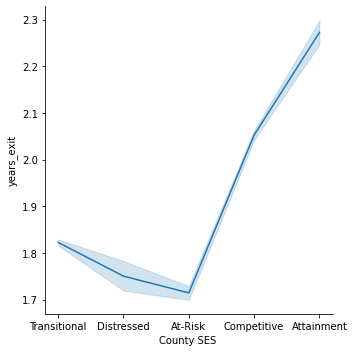

In [34]:
sns.relplot(data = teis_all, x = 'County SES ', y = 'years_exit', kind = 'line');

In [20]:
teis_referral_avg = teis_all.groupby(['Referral Source Type Name']).mean()
teis_referral_avg

,years_exit,years_notification,months_exit
Referral Source Type Name,,,
CAPTA,2.320548,2.320548,28.233333
Child Care provider,2.523427,2.523427,30.701695
Community/Child Find Activity,1.961891,1.961891,23.869678
DCS,1.118221,1.118221,13.605022
DHS,1.617047,1.617047,19.674074
DMRS,NaN,NaN,NaN
Dept. of Health,1.924390,1.924390,23.413414
EIRA,2.296722,2.296722,27.943450
Early Head Start/Head Start,2.452262,2.452262,29.835851


C:\Users\bruna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


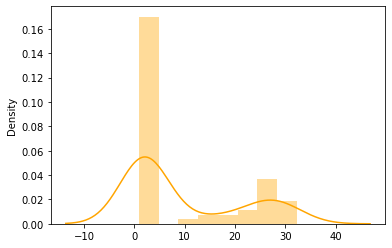

In [21]:
sns.distplot(teis_referral_avg, bins = 8, color = 'orange');

In [22]:
#graph
plt.scatter(teis_all['County SES '], teis_all['Years'], color = 'green')
plt.xlabel('County SES')
plt.ylabel('Years')
plt.title('Average Child Years per County SES');

KeyError: 'Years'

In [23]:
plt.scatter(teis_all['Referral Source Type Name'], teis_all['Years'], color = 'green')
plt.xlabel('Referral Source Type Name')
plt.ylabel('Years')
plt.title('Average Child Years per Referral Source Type');

KeyError: 'Years'

In [24]:
sns.relplot(data = teis_all, x= teis_all['Referral Source Type Name'], y= teis_all['Years'], hue = 'Referral Source Type Name');

KeyError: 'Years'

In [25]:
# each referral source type by each county social economic status
teis_all.groupby(['Referral Source Type Name', 'County SES '])['County SES '].count()

Referral Source Type Name  County SES  
CAPTA                      Transitional      1
Child Care provider        At-Risk          41
                           Attainment        4
                           Competitive      85
                           Distressed        3
                                          ... 
Speech Therapist           Competitive     199
                           Distressed        6
                           Transitional    305
TIPS                       At-Risk           1
                           Transitional      1
Name: County SES , Length: 101, dtype: int64

In [26]:
teis_all.groupby(['County SES ', 'POE']).max()

C:\Users\bruna\AppData\Local\Temp/ipykernel_27368/2336586873.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  teis_all.groupby(['County SES ', 'POE']).max()


DOB County Name  County SES Referral Source Type Name  \
County SES   POE                                                                
At-Risk      ET  2022-06-03       Union         NaN          Speech Therapist   
             FT  2022-06-11       Union         NaN          Speech Therapist   
             GN  2021-02-15      Warren         NaN                       PCP   
             NW  2022-06-06       Obion         NaN                      TIPS   
             SC  2022-06-02       Wayne         NaN                    Parent   
             SE  2022-06-15      Warren         NaN                    Parent   
             SW  2022-05-23       Wayne         NaN                    Parent   
             UC  2022-05-19      Warren         NaN          Speech Therapist   
Attainment   GN  2020-08-16  Williamson         NaN                       PCP   
             SC  2022-06-08  Williamson         NaN          Speech Therapist   
             SE  2016-04-13  Williamson         NaN                    Parent   
Competitive  GN  2022-06-21      Wilson         NaN          Speech Therapist   
             MD  2018-05-22    Davidson         NaN                       PCP   
             SC  2022-06-08      Wilson         NaN          Speech Therapist   
             UC  2022-05-22      Wilson         NaN          Speech Therapist   
Distressed   ET  2022-06-18       Scott         NaN          Speech Therapist   
             FT  2022-05-05     Hancock         NaN          Speech Therapist   
             MD  2013-12-28       Scott         NaN                    Parent   
             NW  2022-05-02  Lauderdale         NaN          Speech Therapist   
             SC  2022-03-28       Perry         NaN          Speech Therapist   
             SE  2022-06-07      Grundy         NaN                    Parent   
             UC  2021-07-26        Clay         NaN                    Parent   
Transitional ET  2022-06-20  Washington         NaN                      TIPS   
             FT  2022-06-18  Washington         NaN          Speech Therapist   
             GN  2022-06-29   Trousdale         NaN          Speech Therapist   
             MD  2022-06-11      Tipton         NaN          Speech Therapist   
             NW  2022-06-23     Weakley         NaN          Speech Therapist   
             SC  2022-06-09       White         NaN          Speech Therapist   
             SE  2022-06-27        Polk         NaN          Speech Therapist   
             SW  2022-06-14      Tipton         NaN          Speech Therapist   
             UC  2022-06-16       White         NaN          Speech Therapist   

                 Notification/ Referral Date Notification Date exit_date_age  \
County SES   POE                                                               
At-Risk      ET                          NaT        2022-07-01     1238 days   
             FT                          NaT        2022-07-01     1131 days   
             GN                          NaT        2022-05-11      466 days   
             NW                          NaT        2022-06-30     1353 days   
             SC                          NaT        2022-07-01     1095 days   
             SE                          NaT        2022-07-01     1096 days   
             SW                          NaT        2022-06-28     1096 days   
             UC                          NaT        2022-06-29     1095 days   
Attainment   GN                          NaT        2020-08-31      679 days   
             SC                          NaT        2022-07-01     1096 days   
             SE                          NaT        2018-01-30      742 days   
Competitive  GN                          NaT        2022-07-01     1404 days   
             MD                          NaT        2020-06-18      993 days   
             SC                          NaT        2022-07-01     1114 days   
             UC                          NaT        2022-07-01     109

In [27]:
teis_all.groupby(['County SES ', 'POE']).min()

C:\Users\bruna\AppData\Local\Temp/ipykernel_27368/2074822790.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  teis_all.groupby(['County SES ', 'POE']).min()


DOB County Name  County SES Referral Source Type Name  \
County SES   POE                                                                
At-Risk      ET  2013-10-20    Campbell         NaN       Child Care provider   
             FT  2013-07-31    Campbell         NaN       Child Care provider   
             GN  2016-10-12     Houston         NaN                       PCP   
             NW  2013-11-09      Benton         NaN       Child Care provider   
             SC  2014-01-01      Hardin         NaN       Child Care provider   
             SE  2013-10-12       Meigs         NaN       Child Care provider   
             SW  2013-08-23    Hardeman         NaN       Child Care provider   
             UC  2013-10-15    Fentress         NaN       Child Care provider   
Attainment   GN  2015-12-24  Williamson         NaN                  Hospital   
             SC  2013-11-01  Williamson         NaN       Child Care provider   
             SE  2016-04-13  Williamson         NaN                    Parent   
Competitive  GN  2007-07-07    Cheatham         NaN       Child Care provider   
             MD  2018-05-22    Davidson         NaN                       PCP   
             SC  2013-10-21    Davidson         NaN       Child Care provider   
             UC  2013-10-29    Davidson         NaN       Child Care provider   
Distressed   ET  2014-03-02       Cocke         NaN                       DCS   
             FT  2013-11-13       Cocke         NaN       Child Care provider   
             MD  2013-12-28       Scott         NaN                    Parent   
             NW  2013-12-19        Lake         NaN                       DCS   
             SC  2014-06-17        Clay         NaN       Child Care provider   
             SE  2014-01-17     Bledsoe         NaN       Child Care provider   
             UC  2013-09-25        Clay         NaN                       DCS   
Transitional ET  2013-09-10    Anderson         NaN       Child Care provider   
             FT  2011-07-21     Hamblen         NaN       Child Care provider   
             GN  2013-07-15     Decatur         NaN       Child Care provider   
             MD  2013-07-04  Cumberland         NaN       Child Care provider   
             NW  2013-09-22    Crockett         NaN       Child Care provider   
             SC  2013-02-07     Bedford         NaN                     CAPTA   
             SE  2013-08-07     Bedford         NaN       Child Care provider   
             SW  2013-08-16     Chester         NaN       Child Care provider   
             UC  2013-09-17      Cannon         NaN       Child Care provider   

                 Notification/ Referral Date Notification Date exit_date_age  \
County SES   POE                                                               
At-Risk      ET                          NaT        2016-07-05        4 days   
             FT                          NaT        2016-07-01        8 days   
             GN                          NaT        2017-02-17      254 days   
             NW                          NaT        2016-07-05        4 days   
             SC                          NaT        2016-07-13        8 days   
             SE                          NaT        2016-07-05        4 days   
             SW                          NaT        2016-07-01        5 days   
             UC                          NaT        2016-07-01        8 days   
Attainment   GN                          NaT        2016-08-31       24 days   
             SC                          NaT        2016-07-01        4 days   
             SE                          NaT        2018-01-30      742 days   
Competitive  GN                          NaT        2016-07-01        6 days   
             MD                          NaT        2020-06-18      993 days   
             SC                          NaT        2016-07-01        8 days   
             UC                          NaT        2016-07-01        